In [92]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

from sklearn.cluster import KMeans

In [5]:
mat_file = sio.loadmat('matlab.mat')

In [10]:
mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MODE', 'showImg', 'PHOW_Sizes', 'PHOW_Step', 'imgSel', 'folderName', 'classList', 'cnt', 'c', 'subFolderName', 'imgList', 'imgIdx', 'imgIdx_tr', 'imgIdx_te', 'i', 'I', 'desc_tr', 'desc_sel'])

In [18]:
mat_file['desc_tr'][0][0].shape

(128, 3259)

## K-Means Codebook

In [24]:
desc_sel = mat_file[ 'desc_sel' ]
desc_sel = desc_sel.T

desc_sel.shape

(100000, 128)

In [25]:
no_clusters = 256

codebook = KMeans( n_clusters = no_clusters, random_state = 0 ).fit( desc_sel )

## Class Histograms

In [36]:
desc_tr   = mat_file[ 'desc_tr' ]
classList = mat_file[ 'classList' ]

In [76]:
class_list = []

for i in range( 10 ):
    class_list.append( classList[ 0 ][ i ][ 0 ] )
    
class_list = np.asarray( class_list )

class_list

array(['tick', 'trilobite', 'umbrella', 'watch', 'water_lilly',
       'wheelchair', 'wild_cat', 'windsor_chair', 'wrench', 'yin_yang'],
      dtype='<U13')

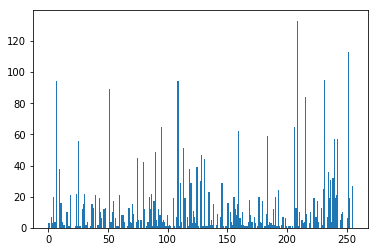

(3051,)

In [123]:
test = desc_tr[0][4]

result = codebook.predict( test.T )

plt.hist( result, bins = range( 0, 256 ) )
plt.show()

In [122]:
hist = np.histogram( result, bins = range( 0, 256 ) )

hist[ 0 ].shape

(255,)

In [155]:
class_0 = desc_tr[ 3 ]

avg_hist = []

for image in class_0:
    
    result = codebook.predict( image.T )
    avg_hist.append( np.histogram( result, bins = 256 )[ 0 ] )
    
avg_hist = np.asarray( avg_hist )
avg_hist = avg_hist.mean(axis = 0)

<BarContainer object of 256 artists>

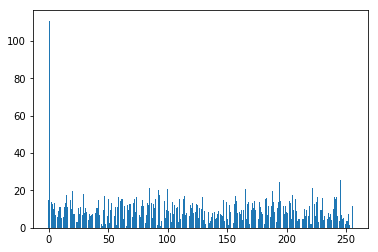

In [156]:
plt.bar( range( 0, 256 ), avg_hist )